# Introverts vs Extroverts 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


Let's load the dataset: train and test.

In [2]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

## Exploraty Data Analysis.

Let's explore the data in train. 

In [3]:
# Size
print(f"Train dataset's size: ", df_train.shape)
print(f"Train dataset's size: ", df_test.shape)

Train dataset's size:  (18524, 9)
Train dataset's size:  (6175, 8)


In [4]:
# Summary of train dataset.
df_train.describe(include='all')

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,18524.000000,17334.000000,16631,17344.000000,17058.000000,17375,17470.000000,17260.000000,18524
unique,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,NaN,12609,NaN,NaN,13313,NaN,NaN,13699
mean,9261.500000,3.137764,NaN,5.265106,4.044319,NaN,7.996737,4.982097,NaN
std,5347.562529,3.003786,NaN,2.753359,2.062580,NaN,4.223484,2.879139,NaN
min,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,4630.750000,1.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
50%,9261.500000,2.000000,NaN,5.000000,4.000000,NaN,8.000000,5.000000,NaN
75%,13892.250000,4.000000,NaN,8.000000,6.000000,NaN,12.000000,7.000000,NaN


In [5]:
# Info of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
# Null values per column 
df_train.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [7]:
# Proportion of null values per column 
df_train.isna().sum() / len(df_train)

id                           0.000000
Time_spent_Alone             0.064241
Stage_fear                   0.102192
Social_event_attendance      0.063701
Going_outside                0.079141
Drained_after_socializing    0.062028
Friends_circle_size          0.056899
Post_frequency               0.068236
Personality                  0.000000
dtype: float64

The proportion of null values is small enough to impute the columns.

In [8]:
df_train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


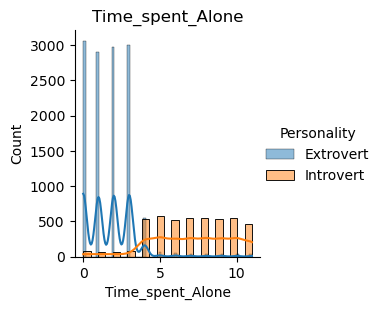

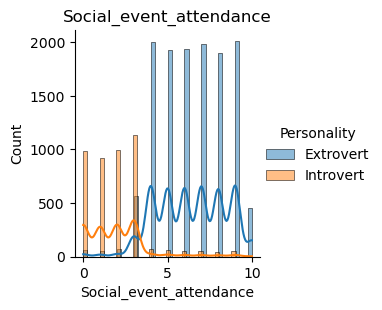

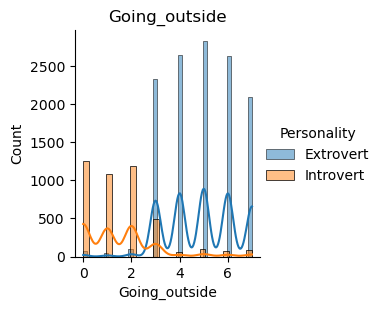

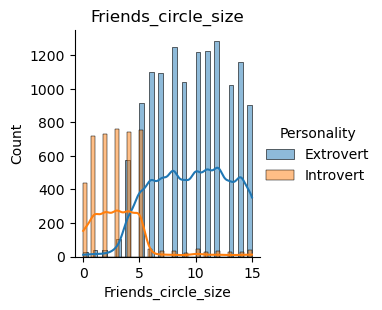

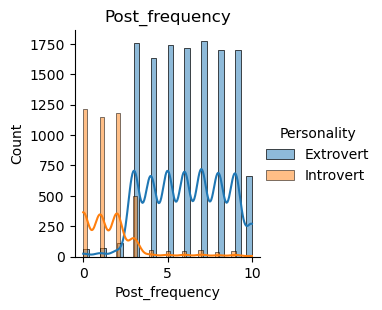

In [9]:
# Distribution of each numerical variable with respect the target
numerical_cols = df_train.drop('id', axis=1).select_dtypes(include='number').columns
for col in numerical_cols:
    sns.FacetGrid(df_train, hue="Personality") \
      .map(sns.histplot, col, kde=True) \
      .add_legend()
    plt.title(col)
    plt.show()


/home/manuel/miniconda3/envs/competencia_kaggle/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


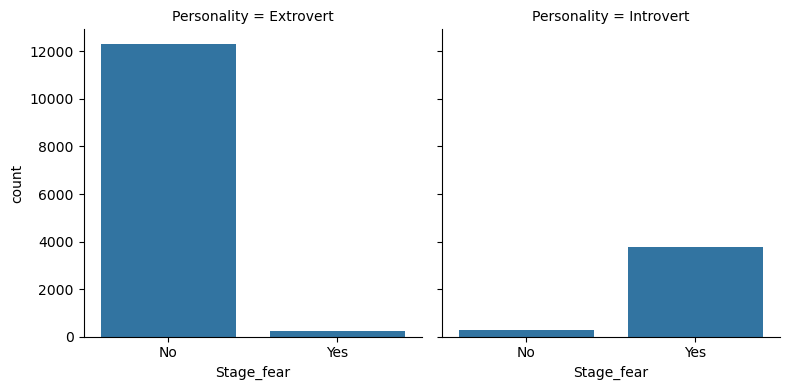

/home/manuel/miniconda3/envs/competencia_kaggle/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


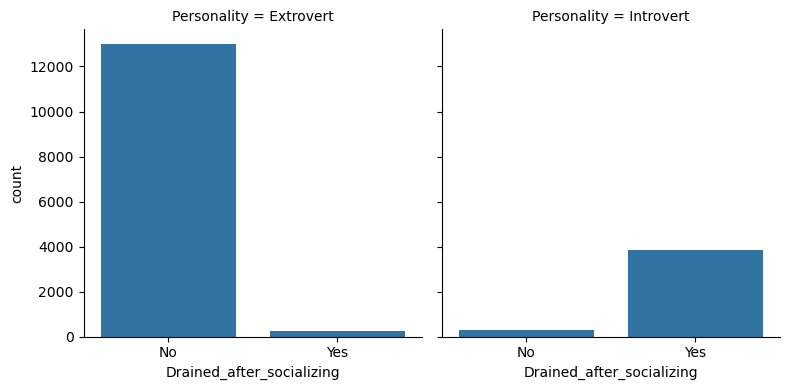

In [10]:
categorical_cols = df_train.drop(['id', 'Personality'], axis=1).select_dtypes(include='object').columns

for col in categorical_cols:
    g = sns.FacetGrid(df_train, col="Personality", height=4)
    g.map(sns.countplot, col)
    plt.show()


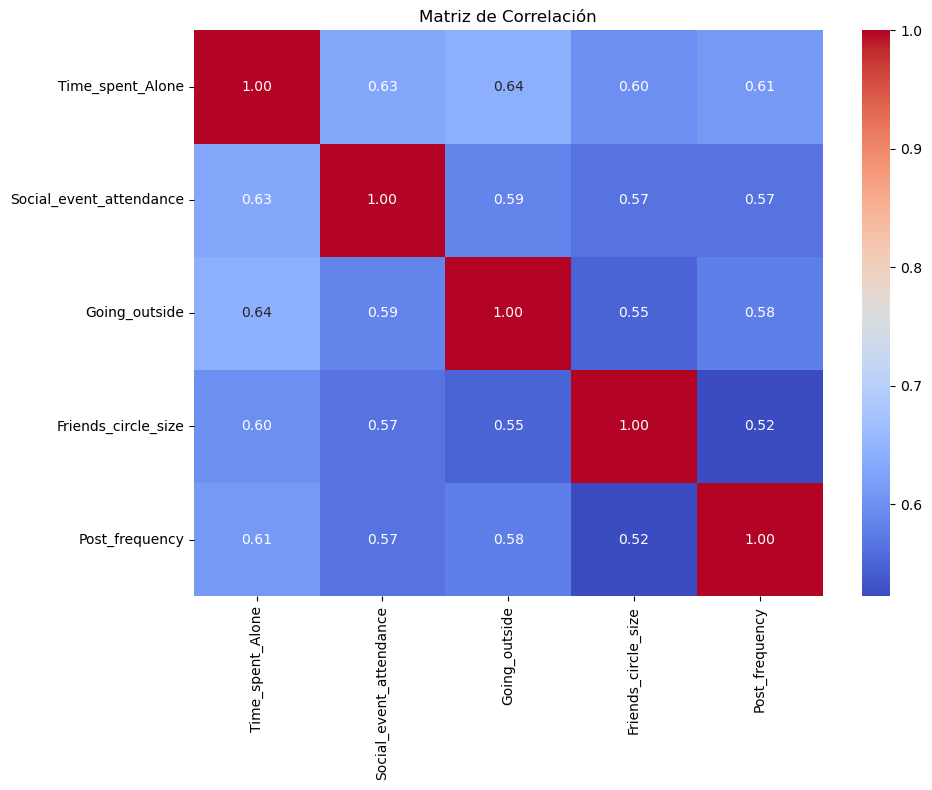

In [11]:
# Pearson Correlation Matrix
corr_matrix = df_train.drop("id", axis=1).select_dtypes(include="number").corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

<Axes: >

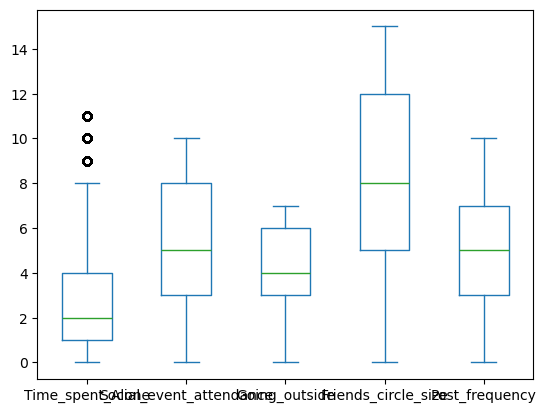

In [12]:
# Box Plots
df_train.drop('id', axis=1).plot(kind='box')

The distribution of the target feature seems to be very clear in the numerical columns and categorical columns. 

## Feature Engineering

In [13]:
from sklearn.preprocessing import OneHotEncoder


num_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler())
]) 

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False,   # Para compatibilidad con SVM
        drop='first'
    ))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols)
])


In [ ]:
# Creating X and y.
le = LabelEncoder()
df_train["Personality_encoded"] = le.fit_transform(df_train["Personality"])
X = df_train.drop(["Personality", "Personality_encoded", "id"], axis=1)
y = df_train["Personality_encoded"]

# 3. Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [15]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("svm", SVC(kernel="rbf", C=1.0, gamma="scale", class_weight='balanced'))
])

In [16]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
from sklearn.metrics import accuracy_score, classification_report

# --- TRAIN ---
train_preds = model.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

print("=== TRAIN REPORT ===")
print(f"Accuracy: {train_acc:.4f}")
print(classification_report(y_train, train_preds))


# --- VALIDATION ---
val_preds = model.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)

print("=== VALIDATION REPORT ===")
print(f"Accuracy: {val_acc:.4f}")
print(classification_report(y_val, val_preds))


=== TRAIN REPORT ===
Accuracy: 0.9686
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10959
           1       0.94      0.93      0.94      3860

    accuracy                           0.97     14819
   macro avg       0.96      0.96      0.96     14819
weighted avg       0.97      0.97      0.97     14819

=== VALIDATION REPORT ===
Accuracy: 0.9711
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.94      0.95      0.94       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



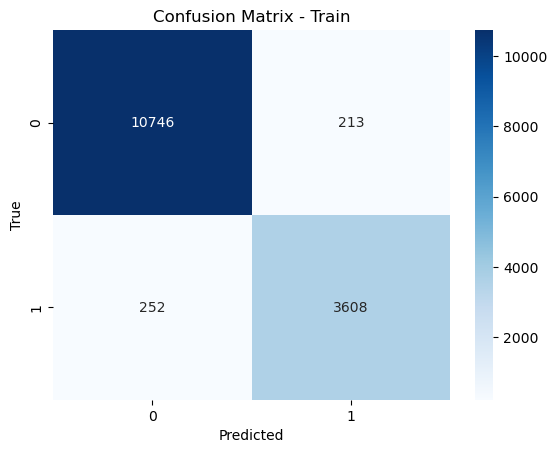

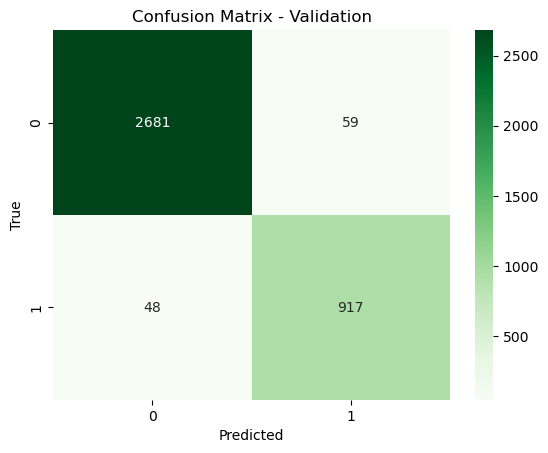

In [18]:
# --- Confussion Matrix ---
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- MATRIZ TRAIN ---
cm_train = confusion_matrix(y_train, train_preds)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Train")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- MATRIZ VALIDATION ---
cm_val = confusion_matrix(y_val, val_preds)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Validation")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [19]:
from sklearn.calibration import LinearSVC

pipelines = {
    "svm": Pipeline([
        ("preprocessor", preprocessor),
        ("clf", SVC())
    ]),
    "svm_linear": Pipeline([
        ("preprocessor", preprocessor),
        ("clf", LinearSVC(max_iter=5000))
    ]),
    "rf": Pipeline([
        ("preprocessor", preprocessor),
        ("clf", RandomForestClassifier())
    ]),
    "gb": Pipeline([
        ("preprocessor", preprocessor),
        ("clf", GradientBoostingClassifier())
    ]),
    "logreg": Pipeline([
        ("preprocessor", preprocessor),
        ("clf", LogisticRegression(max_iter=500))
    ]),
    # === MODELO XGBoost ===
    "xgb": Pipeline([
        ("preprocessor", preprocessor),
        ("clf", XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            tree_method="hist"   # más rápido
        ))
    ]),
    # === MODELO CatBoost ===
    # No requiere OneHot, pero lo dejamos así para integrarlo sin cambios.
    "cat": Pipeline([
        ("preprocessor", preprocessor),
        ("clf", CatBoostClassifier(
            verbose=0
        ))
    ]),
}

param_grids = {
    "svm": {
        "clf__kernel": ["rbf"],
        "clf__C": [0.1, 1, 10, 50, 100],
        "clf__gamma": ["scale", "auto", 0.1, 0.01, 0.001]
    },
    "svm_linear": {
        "clf__C": [0.01, 0.1, 1, 10],
    },
    "rf": {
        "clf__n_estimators": [100, 300, 500],
        "clf__max_depth": [None, 5, 10, 20]
    },
    "gb": {
        "clf__n_estimators": [100, 300, 500],
        "clf__learning_rate": [0.1, 0.05, 0.01],
        "clf__max_depth": [2, 3, 4]
    },
    "logreg": {
        "clf__C": [0.1, 1, 10],
        "clf__penalty": ["l2"]
    },
    # === PARÁMETROS XGBOOST ===
    "xgb": {
        "clf__n_estimators": [300, 500, 800],
        "clf__learning_rate": [0.01, 0.05, 0.1],
        "clf__max_depth": [3, 5, 7],
        "clf__subsample": [0.7, 0.8, 1.0],
        "clf__colsample_bytree": [0.7, 0.8, 1.0],
    },
    # === PARÁMETROS CATBOOST ===
    "cat": {
        "clf__depth": [4, 6, 8],
        "clf__learning_rate": [0.01, 0.05, 0.1],
        "clf__iterations": [300, 500, 800]
    },
}

 

In [20]:
results = {}

for name, pipe in pipelines.items():
    grid = GridSearchCV(
        pipe,
        param_grids[name],
        scoring="f1_macro",  
        cv=5,
        n_jobs=12
    )
    print(f"Entrenando {name}...")
    grid.fit(X_train, y_train)
    results[name] = grid

Entrenando svm...
Entrenando svm_linear...
Entrenando rf...
Entrenando gb...
Entrenando logreg...
Entrenando xgb...
Entrenando cat...


/home/manuel/miniconda3/envs/competencia_kaggle/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [21]:
best_model_name = max(results, key=lambda name: results[name].best_score_)
best_model = results[best_model_name]

print("Mejor modelo:", best_model_name)
print("Mejor score CV:", best_model.best_score_)
print("Mejores hiperparámetros:", best_model.best_params_)


Mejor modelo: rf
Mejor score CV: 0.9589371842464676
Mejores hiperparámetros: {'clf__max_depth': 5, 'clf__n_estimators': 100}


REPORT EN VALIDATION
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.94      0.95      0.94       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



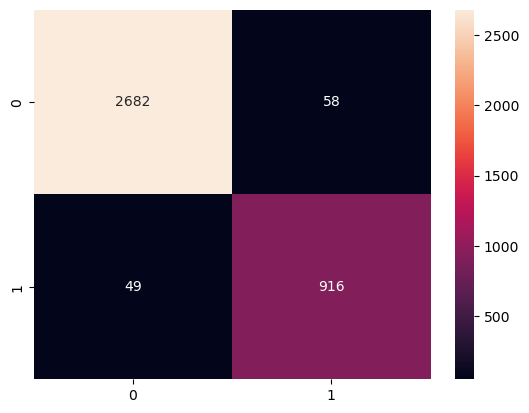

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_val)

print("REPORT EN VALIDATION")
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


In [28]:
final_pipeline = best_model.best_estimator_
X_full = df_train.drop(["Personality", "Personality_encoded", "id"], axis=1)
y_full = df_train["Personality_encoded"]

final_pipeline.fit(X_full, y_full)

,steps,"[('preprocessor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
X_test = df_test.drop(["id"], axis=1)

test_preds = final_pipeline.predict(X_test)


In [31]:
test_preds_labels = le.inverse_transform(test_preds)
submission = pd.DataFrame({
    "id": df_test["id"],
    "Personality": test_preds
})

submission.to_csv("submission.csv", index=False)